In [2]:
import pandas as pd
import numpy as np
from pycaret.classification import *
from pycaret.regression import *
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

print("Libraries imported successfully!")

Libraries imported successfully!


In [7]:
# Update these file paths to match your files
FEATURES_FILE1 = 'zeopp_final_results.csv'  # Your Zeo++ features
# FEATURES_FILE2 = '../inner_averaged_local_soap_mofs.csv'
FEATURES_FILE2 = '../inner_averaged_local_soap_mofs_6k.csv'
# LABELS_FILE = '../id_labels.csv'           # Your labels file
LABELS_FILE = '../comb_id_labels.csv'           # Your labels file
TARGET_COL = 'label'         # Your target variable

select_f = ["filename"]
# Load data
print("Loading features...")
feat1 = pd.read_csv(FEATURES_FILE1)[select_f]
feat1["filename"] = feat1["filename"].astype(str).str.strip()
feat2 = pd.read_csv(FEATURES_FILE2)
feat2["filename"] = feat2["filename"].astype(str).str.strip(".cif")
# features_df = pd.merge(feat1, feat2, on='filename', how='inner')
features_df = feat2
# Clean whitespace from filename column
features_df['filename'] = features_df['filename'].astype(str).str.strip()
print(f"Features shape: {features_df.shape}")
print(f"Feature columns: {list(features_df.columns)}")

print("\nLoading labels...")
labels_df = pd.read_csv(LABELS_FILE)
# Rename 'id' column to 'filename' to match features and clean whitespace
labels_df = labels_df.rename(columns={'id': 'filename'})
labels_df['filename'] = labels_df['filename'].astype(str).str.strip()
print(f"Labels shape: {labels_df.shape}")
print(f"Label columns: {list(labels_df.columns)}")

# Display first few rows
print("\nFirst 5 rows of features:")
display(features_df.head())

print("\nFirst 5 rows of labels:")
display(labels_df.head())

# Check if filenames match now
print("\nFilename matching check:")
print("Sample features filenames:", features_df['filename'].head(3).tolist())
print("Sample labels filenames:", labels_df['filename'].head(3).tolist())

Loading features...
Features shape: (6089, 511)
Feature columns: ['C-C_1', 'C-C_2', 'C-F_1', 'C-F_2', 'C-H_1', 'C-H_2', 'C-N_1', 'C-N_2', 'C-O_1', 'C-O_2', 'C-Zn_1', 'C-Zn_2', 'F-F_1', 'F-F_2', 'F-H_1', 'F-H_2', 'F-N_1', 'F-N_2', 'F-O_1', 'F-O_2', 'F-Zn_1', 'F-Zn_2', 'H-H_1', 'H-H_2', 'H-N_1', 'H-N_2', 'H-O_1', 'H-O_2', 'H-Zn_1', 'H-Zn_2', 'N-N_1', 'N-N_2', 'N-O_1', 'N-O_2', 'N-Zn_1', 'N-Zn_2', 'O-O_1', 'O-O_2', 'O-Zn_1', 'O-Zn_2', 'Zn-Zn_1', 'Zn-Zn_2', 'filename', 'C-Cu_1', 'C-Cu_2', 'Cu-Cu_1', 'Cu-Cu_2', 'Cu-F_1', 'Cu-F_2', 'Cu-H_1', 'Cu-H_2', 'Cu-N_1', 'Cu-N_2', 'Cu-O_1', 'Cu-O_2', 'C-Li_1', 'C-Li_2', 'H-Li_1', 'H-Li_2', 'Li-Li_1', 'Li-Li_2', 'Li-O_1', 'Li-O_2', 'Li-Zn_1', 'Li-Zn_2', 'C-Fe_1', 'C-Fe_2', 'Fe-Fe_1', 'Fe-Fe_2', 'Fe-H_1', 'Fe-H_2', 'Fe-N_1', 'Fe-N_2', 'Fe-O_1', 'Fe-O_2', 'C-Cl_1', 'C-Cl_2', 'Cl-Cl_1', 'Cl-Cl_2', 'Cl-H_1', 'Cl-H_2', 'Cl-N_1', 'Cl-N_2', 'Cl-O_1', 'Cl-O_2', 'Cl-Zn_1', 'Cl-Zn_2', 'Cl-Cu_1', 'Cl-Cu_2', 'F-Fe_1', 'F-Fe_2', 'C-S_1', 'C-S_2', 'H-S_1', 'H-S_2', 

,C-C_1,C-C_2,C-F_1,C-F_2,C-H_1,C-H_2,C-N_1,C-N_2,C-O_1,C-O_2,...,Ag-O_1,Ag-O_2,C-Sm_1,C-Sm_2,H-Sm_1,H-Sm_2,O-Sm_1,O-Sm_2,Sm-Sm_1,Sm-Sm_2
0,0.617679,1.760946e-14,1.947711,-2.564085e-14,0.128998,-2.989266e-15,0.732725,8.540680e-15,0.118092,1.499826e-15,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.751641,1.955410e-05,0.000000,0.000000e+00,4.945373,-1.793970e-05,0.259450,8.981436e-09,0.858863,-1.616099e-06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.673655,5.202079e-05,0.000000,0.000000e+00,2.302990,6.010189e-05,0.314487,-9.609548e-05,0.583760,-1.595749e-05,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.158531,6.927067e-04,0.371533,3.231954e-04,0.721465,-1.715912e-04,0.297476,3.032203e-04,0.139578,-1.882334e-04,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.227774,8.395185e-07,0.000000,0.000000e+00,4.898229,-7.405270e-07,0.208786,1.553456e-08,0.785940,-9.974652e-08,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0



First 5 rows of labels:


,filename,label
0,DB5-hypotheticalMOF_17652_0_0_1_21_9_7_repeat,13.791591
1,DB0-m2_o8_o23_f0_pcu.sym.80_repeat,3.786996
2,DB0-m29_o90_o1500_f0_pts.sym.31_repeat,9.382537
3,DB0-m3_o48_o25_f0_fsc.sym.3_repeat,11.650365
4,DB0-m2_o1_o9_f0_nbo.sym.104_repeat,1.412915



Filename matching check:
Sample features filenames: ['DB0-m3_o10_o25_f0_pcu.sym.23_repeat', 'DB0-m3_o1_o24_f0_pcu.sym.39_repeat', 'DB0-m3_o520_o25_f0_fsc.sym.8_repeat']
Sample labels filenames: ['DB5-hypotheticalMOF_17652_0_0_1_21_9_7_repeat', 'DB0-m2_o8_o23_f0_pcu.sym.80_repeat', 'DB0-m29_o90_o1500_f0_pts.sym.31_repeat']


In [11]:
# Merge datasets
print("Merging features and labels...")
merged_df = pd.merge(features_df, labels_df, on='filename', how='inner')
print(f"Merged data shape: {merged_df.shape}")
print(f"Successfully merged {len(merged_df)} samples")

# Check for any missing merges
feature_files = set(features_df['filename'])
label_files = set(labels_df['filename'])
print(f"\nFiles in features only: {len(feature_files - label_files)}")
print(f"Files in labels only: {len(label_files - feature_files)}")
print(f"Files in both: {len(feature_files.intersection(label_files))}")

display(merged_df.head())

Merging features and labels...
Merged data shape: (6089, 512)
Successfully merged 6089 samples

Files in features only: 0
Files in labels only: 0
Files in both: 6089


,C-C_1,C-C_2,C-F_1,C-F_2,C-H_1,C-H_2,C-N_1,C-N_2,C-O_1,C-O_2,...,Ag-O_2,C-Sm_1,C-Sm_2,H-Sm_1,H-Sm_2,O-Sm_1,O-Sm_2,Sm-Sm_1,Sm-Sm_2,label
0,0.617679,1.760946e-14,1.947711,-2.564085e-14,0.128998,-2.989266e-15,0.732725,8.540680e-15,0.118092,1.499826e-15,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.494934
1,2.751641,1.955410e-05,0.000000,0.000000e+00,4.945373,-1.793970e-05,0.259450,8.981436e-09,0.858863,-1.616099e-06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.736934
2,0.673655,5.202079e-05,0.000000,0.000000e+00,2.302990,6.010189e-05,0.314487,-9.609548e-05,0.583760,-1.595749e-05,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.862454
3,1.158531,6.927067e-04,0.371533,3.231954e-04,0.721465,-1.715912e-04,0.297476,3.032203e-04,0.139578,-1.882334e-04,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.544133
4,2.227774,8.395185e-07,0.000000,0.000000e+00,4.898229,-7.405270e-07,0.208786,1.553456e-08,0.785940,-9.974652e-08,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.667241


In [12]:
# Preprocess features
print("Preprocessing data...")

# Get feature columns (exclude filename and target)
feature_cols = [col for col in merged_df.columns if col not in ['filename', TARGET_COL]]
print(f"Feature columns ({len(feature_cols)}): {feature_cols}")

# Convert 'NA' strings to NaN and make numeric
for col in feature_cols:
    if merged_df[col].dtype == 'object':
        merged_df[col] = merged_df[col].replace('NA', np.nan)
        merged_df[col] = pd.to_numeric(merged_df[col], errors='coerce')

# Check missing values
print("\nMissing values per column:")
missing_counts = merged_df[feature_cols + [TARGET_COL]].isnull().sum()
print(missing_counts[missing_counts > 0])

# Remove rows with missing target
initial_rows = len(merged_df)
merged_df = merged_df.dropna(subset=[TARGET_COL])
final_rows = len(merged_df)
print(f"\nRemoved {initial_rows - final_rows} rows with missing target values")
print(f"Final dataset size: {final_rows} samples")

Preprocessing data...
Feature columns (510): ['C-C_1', 'C-C_2', 'C-F_1', 'C-F_2', 'C-H_1', 'C-H_2', 'C-N_1', 'C-N_2', 'C-O_1', 'C-O_2', 'C-Zn_1', 'C-Zn_2', 'F-F_1', 'F-F_2', 'F-H_1', 'F-H_2', 'F-N_1', 'F-N_2', 'F-O_1', 'F-O_2', 'F-Zn_1', 'F-Zn_2', 'H-H_1', 'H-H_2', 'H-N_1', 'H-N_2', 'H-O_1', 'H-O_2', 'H-Zn_1', 'H-Zn_2', 'N-N_1', 'N-N_2', 'N-O_1', 'N-O_2', 'N-Zn_1', 'N-Zn_2', 'O-O_1', 'O-O_2', 'O-Zn_1', 'O-Zn_2', 'Zn-Zn_1', 'Zn-Zn_2', 'C-Cu_1', 'C-Cu_2', 'Cu-Cu_1', 'Cu-Cu_2', 'Cu-F_1', 'Cu-F_2', 'Cu-H_1', 'Cu-H_2', 'Cu-N_1', 'Cu-N_2', 'Cu-O_1', 'Cu-O_2', 'C-Li_1', 'C-Li_2', 'H-Li_1', 'H-Li_2', 'Li-Li_1', 'Li-Li_2', 'Li-O_1', 'Li-O_2', 'Li-Zn_1', 'Li-Zn_2', 'C-Fe_1', 'C-Fe_2', 'Fe-Fe_1', 'Fe-Fe_2', 'Fe-H_1', 'Fe-H_2', 'Fe-N_1', 'Fe-N_2', 'Fe-O_1', 'Fe-O_2', 'C-Cl_1', 'C-Cl_2', 'Cl-Cl_1', 'Cl-Cl_2', 'Cl-H_1', 'Cl-H_2', 'Cl-N_1', 'Cl-N_2', 'Cl-O_1', 'Cl-O_2', 'Cl-Zn_1', 'Cl-Zn_2', 'Cl-Cu_1', 'Cl-Cu_2', 'F-Fe_1', 'F-Fe_2', 'C-S_1', 'C-S_2', 'H-S_1', 'H-S_2', 'N-S_1', 'N-S_2', 'O-S_1', 'O-S_

Dataset statistics:


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

             C-C_1        C-C_2        C-F_1        C-F_2        C-H_1  \
count  6089.000000  6089.000000  6089.000000  6089.000000  6089.000000   
mean      2.272564     0.000222     0.127493    -0.000002     2.135316   
std       1.951474     0.000400     0.612050     0.000047     2.028469   
min       0.000000     0.000000     0.000000    -0.001310     0.000000   
25%       1.150014     0.000009     0.000000     0.000000     0.315852   
50%       1.764663     0.000080     0.000000     0.000000     1.104196   
75%       2.693215     0.000246     0.000000     0.000000     3.921307   
max      14.630125     0.005139     6.131235     0.000601    10.224754   

              C-H_2        C-N_1         C-N_2        C-O_1         C-O_2  \
count  6.089000e+03  6089.000000  6.089000e+03  6089.000000  6.089000e+03   
mean  -6.953738e-05     0.466058 -2.358378e-05     0.482967 -3.857354e-05   
std    2.230591e-04     0.457418  1.463699e-04     0.446863  1.633825e-04   
min   -3.741764e-03     0

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

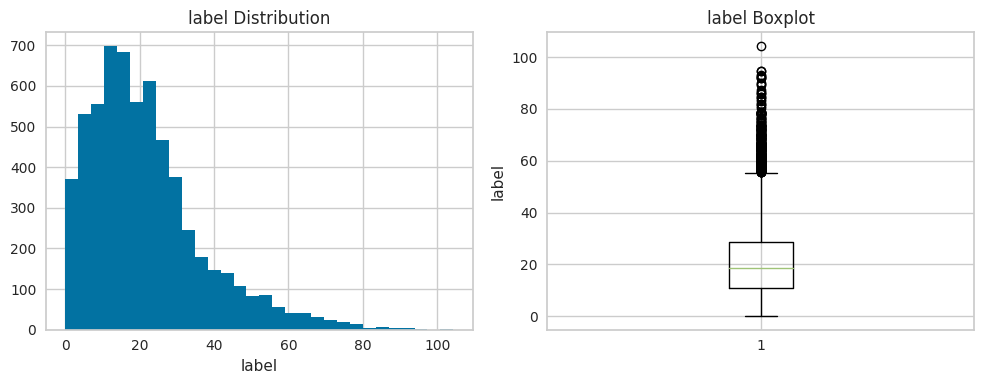

In [13]:
# Basic statistics
print("Dataset statistics:")
print(merged_df[feature_cols + [TARGET_COL]].describe())

# Target variable analysis
print(f"\nTarget variable: {TARGET_COL}")
if merged_df[TARGET_COL].dtype in ['int64', 'float64']:
    print("Target statistics:")
    print(merged_df[TARGET_COL].describe())
    
    # Plot target distribution
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    merged_df[TARGET_COL].hist(bins=30)
    plt.title(f'{TARGET_COL} Distribution')
    plt.xlabel(TARGET_COL)
    
    plt.subplot(1, 2, 2)
    plt.boxplot(merged_df[TARGET_COL])
    plt.title(f'{TARGET_COL} Boxplot')
    plt.ylabel(TARGET_COL)
    plt.tight_layout()
    plt.show()
else:
    print("Target value counts:")
    print(merged_df[TARGET_COL].value_counts())
    
    # Plot target distribution
    plt.figure(figsize=(8, 5))
    merged_df[TARGET_COL].value_counts().plot(kind='bar')
    plt.title(f'{TARGET_COL} Distribution')
    plt.xlabel(TARGET_COL)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

In [14]:
# Prepare final dataset for machine learning
ml_data = merged_df[[TARGET_COL] + feature_cols].copy()

print(f"ML dataset shape: {ml_data.shape}")
print(f"Features: {len(feature_cols)}")
print(f"Samples: {len(ml_data)}")

# Check final data quality
print("\nFinal data info:")
print(ml_data.info())

# Determine task type
target_unique = merged_df[TARGET_COL].nunique()
if merged_df[TARGET_COL].dtype in ['int64', 'float64'] and target_unique > 10:
    TASK_TYPE = 'regression'
    print(f"\nDetected REGRESSION task (continuous target with {target_unique} unique values)")
else:
    TASK_TYPE = 'classification'
    print(f"\nDetected CLASSIFICATION task ({target_unique} classes)")

print(f"Task type: {TASK_TYPE}")

ML dataset shape: (6089, 511)
Features: 510
Samples: 6089

Final data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6089 entries, 0 to 6088
Columns: 511 entries, label to Sm-Sm_2
dtypes: float64(511)
memory usage: 23.7 MB
None

Detected REGRESSION task (continuous target with 6049 unique values)
Task type: regression


In [15]:
# Only run this cell if TASK_TYPE == 'regression'
if TASK_TYPE == 'regression':
    print("Setting up regression environment with normalization...")
    
    reg = setup(
            data=ml_data,
            target=TARGET_COL,
            train_size=0.8,
            session_id=123,
            # silent=True,
            fold=5,
            # Minimal preprocessing
            normalize=True,          # Only keep normalization
            transformation=False,    # Disable transformation
            remove_outliers=False,   # Disable outlier removal
            feature_selection=False, # Disable feature selection
        )
    
    print("Regression setup complete with preprocessing!")

Setting up regression environment with normalization...


,Description,Value
0,Session id,123
1,Target,label
2,Target type,Regression
3,Original data shape,"(6089, 511)"
4,Transformed data shape,"(6089, 511)"
5,Transformed train set shape,"(4871, 511)"
6,Transformed test set shape,"(1218, 511)"
7,Numeric features,510
8,Preprocess,True
9,Imputation type,simple


Regression setup complete with preprocessing!


In [16]:
# Check what preprocessing was applied
print("=== PREPROCESSING SUMMARY ===")
print("\nDataset shape after preprocessing:")
print(f"Training features: {get_config('X_train').shape}")
print(f"Test features: {get_config('X_test').shape}")

# Show what transformations were applied
print(f"\nFeatures after preprocessing: {len(get_config('X_train').columns)}")
print(f"Original features: {len(feature_cols)}")

if len(get_config('X_train').columns) != len(feature_cols):
    print(f"Feature selection removed: {len(feature_cols) - len(get_config('X_train').columns)} features")

# Show sample of processed data
print("\nSample of preprocessed training data:")
display(get_config('X_train').head())

print("\nPreprocessed data statistics:")
display(get_config('X_train').describe())

# Check if normalization worked (should have mean~0, std~1)
means = get_config('X_train').mean()
stds = get_config('X_train').std()
print(f"\nNormalization check:")
print(f"Feature means range: {means.min():.3f} to {means.max():.3f} (should be near 0)")
print(f"Feature stds range: {stds.min():.3f} to {stds.max():.3f} (should be near 1)")

=== PREPROCESSING SUMMARY ===

Dataset shape after preprocessing:
Training features: (4871, 510)
Test features: (1218, 510)



Features after preprocessing: 510
Original features: 510

Sample of preprocessed training data:


,C-C_1,C-C_2,C-F_1,C-F_2,C-H_1,C-H_2,C-N_1,C-N_2,C-O_1,C-O_2,...,Ag-O_1,Ag-O_2,C-Sm_1,C-Sm_2,H-Sm_1,H-Sm_2,O-Sm_1,O-Sm_2,Sm-Sm_1,Sm-Sm_2
3077,2.012708,0.000053,0.0,0.0,4.271940,-5.794891e-05,0.171474,-3.291903e-08,0.532930,0.000005,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5414,2.093371,0.000456,0.0,0.0,4.159964,3.506775e-05,0.503822,-2.157428e-04,0.533878,-0.000276,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1434,5.212572,0.000070,0.0,0.0,6.552974,-2.066485e-05,0.293511,5.339661e-06,1.010521,-0.000049,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
838,1.669683,0.000095,0.0,0.0,1.111308,-3.822991e-05,0.000000,0.000000e+00,0.212566,-0.000023,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3807,1.284445,0.000028,0.0,0.0,0.201674,2.675877e-07,0.699044,-5.051521e-05,0.067387,-0.000002,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0



Preprocessed data statistics:


,C-C_1,C-C_2,C-F_1,C-F_2,C-H_1,C-H_2,C-N_1,C-N_2,C-O_1,C-O_2,...,Ag-O_1,Ag-O_2,C-Sm_1,C-Sm_2,H-Sm_1,H-Sm_2,O-Sm_1,O-Sm_2,Sm-Sm_1,Sm-Sm_2
count,4871.000000,4871.000000,4871.000000,4871.000000,4871.000000,4.871000e+03,4871.000000,4.871000e+03,4871.000000,4.871000e+03,...,4871.000000,4.871000e+03,4871.000000,4.871000e+03,4871.000000,4.871000e+03,4871.000000,4.871000e+03,4871.000000,4.871000e+03
mean,2.269744,0.000226,0.126418,-0.000002,2.135774,-7.214960e-05,0.465452,-2.458318e-05,0.483465,-3.972043e-05,...,0.000059,-9.847352e-10,0.000053,-1.608746e-16,0.000086,-3.939207e-17,0.000023,-2.135039e-16,0.000004,4.137706e-16
std,1.959532,0.000406,0.606004,0.000044,2.020872,2.328753e-04,0.460118,1.497238e-04,0.449595,1.679522e-04,...,0.004145,6.872718e-08,0.002647,8.058413e-15,0.004335,1.442373e-14,0.001128,1.814445e-14,0.000181,2.043785e-14
min,0.000000,0.000000,0.000000,-0.000991,0.000000,-3.741764e-03,0.000000,-3.107989e-03,0.000000,-2.893022e-03,...,0.000000,-4.796645e-06,0.000000,-4.601617e-13,0.000000,-8.011959e-13,0.000000,-1.248944e-12,0.000000,0.000000e+00
25%,1.131152,0.000009,0.000000,0.000000,0.320385,-6.778165e-05,0.086417,-1.099124e-05,0.129715,-2.772292e-05,...,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00
50%,1.750745,0.000080,0.000000,0.000000,1.114818,-4.236702e-06,0.347971,0.000000e+00,0.253220,-2.616427e-07,...,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00
75%,2.706105,0.000249,0.000000,0.000000,3.906162,1.756891e-08,0.746030,4.824477e-08,0.802388,4.900244e-07,...,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00
max,14.630125,0.005139,6.131235,0.000601,10.045406,1.137036e-03,4.037317,1.097238e-03,4.329909,1.064495e-03,...,0.289307,0.000000e+00,0.146117,0.000000e+00,0.250872,6.093171e-13,0.059650,2.089667e-13,0.009667,1.052391e-12



Normalization check:
Feature means range: -0.000 to 3.989 (should be near 0)
Feature stds range: 0.000 to 4.392 (should be near 1)


In [18]:
# Only run this cell if TASK_TYPE == 'regression'
if TASK_TYPE == 'regression':
    print("Comparing regression models...")
    
    # Compare multiple algorithms
    best_models = compare_models(
        include=['lr', 'rf', 'et', 'gbr', 'lightgbm', 'dt'], # 'xgboost',
        sort='R2',
        n_select=5,  # Keep top 5 models
        verbose=True
    )
    
    print("Model comparison complete!")

Comparing regression models...


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,12:52:57
Status,. . . . . . . . . . . . . . . . . .,Fitting 5 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Linear Regression


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,11.1894,229.4061,15.1441,0.0403,0.7828,2.1188,1.8720
rf,Random Forest Regressor,11.0656,230.9335,15.1953,0.0336,0.7858,2.0135,1.6920
et,Extra Trees Regressor,11.0206,233.2730,15.2724,0.0238,0.7844,1.9265,1.0840
lightgbm,Light Gradient Boosting Machine,11.2093,238.6291,15.4461,0.0015,0.7905,2.0129,53.6880
dt,Decision Tree Regressor,14.6883,455.4976,21.3360,-0.9084,1.0271,1.7053,0.1860
lr,Linear Regression,431530972.3656,827711660584763392000.0000,13470781310.4000,-3338958276095084544.0000,1.8835,21946333.5141,0.7180


Model comparison complete!


In [ ]:
# Create the best performing model
print("Creating best model...")
best_model = create_model(best_models[0])

# Tune hyperparameters
print("\nTuning hyperparameters...")
tuned_model = tune_model(best_model, optimize='R2' if TASK_TYPE == 'regression' else 'Accuracy')

print("Model creation and tuning complete!")

Creating best model...


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3.4798,19.9139,4.4625,0.6701,0.5007,3.8066
1,3.1877,16.6105,4.0756,0.7469,0.4266,0.7734
2,3.3702,18.7402,4.3290,0.6824,0.4647,0.5497
3,3.4918,19.1659,4.3779,0.6692,0.4503,0.5146
4,3.5207,20.2987,4.5054,0.6949,0.4703,0.5752
Mean,3.4100,18.9458,4.3501,0.6927,0.4625,1.2439
Std,0.1223,1.2894,0.1506,0.0287,0.0243,1.2845



Tuning hyperparameters...


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,14:10:36
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,Light Gradient Boosting Machine


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [ ]:
# Evaluate the tuned model
print("Evaluating model performance...")
evaluate_model(tuned_model)

In [ ]:
# Feature importance analysis
print("Analyzing feature importance...")

try:
    # Try using PyCaret's built-in feature importance
    if TASK_TYPE == 'classification':
        plot_model(tuned_model, plot='feature', display_format='streamlit')
    else:
        plot_model(tuned_model, plot='feature', display_format='streamlit')
except:
    print("PyCaret feature importance not available for this model. Using alternative method...")
    
    # Alternative: Extract feature importance from the model directly
    try:
        # Get the actual sklearn model
        sklearn_model = tuned_model
        
        # Extract feature importance based on model type
        if hasattr(sklearn_model, 'feature_importances_'):
            # Tree-based models (RF, XGBoost, etc.)
            importance_scores = sklearn_model.feature_importances_
            importance_type = "Tree-based Feature Importance"
        elif hasattr(sklearn_model, 'coef_'):
            # Linear models
            importance_scores = np.abs(sklearn_model.coef_).flatten()
            importance_type = "Coefficient Magnitude"
        else:
            print("Feature importance not available for this model type")
            importance_scores = None
        
        if importance_scores is not None:
            # Create feature importance DataFrame
            feature_importance_df = pd.DataFrame({
                'Feature': feature_cols,
                'Importance': importance_scores
            }).sort_values('Importance', ascending=False)
            
            print(f"\n{importance_type}:")
            print(feature_importance_df.head(15))
            
            # Plot feature importance
            plt.figure(figsize=(12, 8))
            top_features = feature_importance_df.head(15)
            plt.barh(range(len(top_features)), top_features['Importance'])
            plt.yticks(range(len(top_features)), top_features['Feature'])
            plt.xlabel('Importance')
            plt.title(f'Top 15 Features - {importance_type}')
            plt.gca().invert_yaxis()
            plt.tight_layout()
            plt.show()
            
            # Save feature importance
            feature_importance_df.to_csv('feature_importance.csv', index=False)
            print(f"\nFeature importance saved to: feature_importance.csv")
            
    except Exception as e:
        print(f"Could not extract feature importance: {e}")
        print("This might be a complex ensemble model where feature importance is not directly accessible")

# Alternative: Use permutation importance (works for any model)
try:
    from sklearn.inspection import permutation_importance
    print("\nCalculating permutation importance (this may take a moment)...")
    
    # Get test data
    X_test = get_config('X_test')
    y_test = get_config('y_test')
    
    # Calculate permutation importance
    perm_importance = permutation_importance(tuned_model, X_test, y_test, 
                                           n_repeats=5, random_state=123, n_jobs=-1)
    
    # Create DataFrame
    perm_importance_df = pd.DataFrame({
        'Feature': feature_cols,
        'Importance_Mean': perm_importance.importances_mean,
        'Importance_Std': perm_importance.importances_std
    }).sort_values('Importance_Mean', ascending=False)
    
    print("\nPermutation Importance (Top 15):")
    print(perm_importance_df.head(15))
    
    # Plot permutation importance
    plt.figure(figsize=(12, 8))
    top_perm_features = perm_importance_df.head(15)
    plt.barh(range(len(top_perm_features)), top_perm_features['Importance_Mean'],
             xerr=top_perm_features['Importance_Std'])
    plt.yticks(range(len(top_perm_features)), top_perm_features['Feature'])
    plt.xlabel('Permutation Importance')
    plt.title('Top 15 Features - Permutation Importance')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()
    
    # Save permutation importance
    perm_importance_df.to_csv('permutation_importance.csv', index=False)
    print(f"\nPermutation importance saved to: permutation_importance.csv")
    
except Exception as e:
    print(f"Could not calculate permutation importance: {e}")

print("\nFeature importance analysis complete!")

In [ ]:
# Get predictions on both training and test sets
print("=== PREDICTIONS vs ACTUAL ===")

# Get test set predictions (this includes actual vs predicted)
test_predictions = predict_model(tuned_model)
print("Test set predictions:")
display(test_predictions.head(10))

# Get training set predictions
train_predictions = predict_model(tuned_model, data=get_config('X_train').assign(**{TARGET_COL: get_config('y_train')}))
print("\nTraining set predictions:")
display(train_predictions.head(10))

# Create comparison plots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

if TASK_TYPE == 'regression':
    # For regression: scatter plots of actual vs predicted
    
    # Test set
    axes[0,0].scatter(test_predictions[TARGET_COL], test_predictions['prediction_label'], alpha=0.6)
    axes[0,0].plot([test_predictions[TARGET_COL].min(), test_predictions[TARGET_COL].max()], 
                   [test_predictions[TARGET_COL].min(), test_predictions[TARGET_COL].max()], 'r--', lw=2)
    axes[0,0].set_xlabel('Actual')
    axes[0,0].set_ylabel('Predicted')
    axes[0,0].set_title('Test Set: Actual vs Predicted')
    axes[0,0].grid(True, alpha=0.3)
    
    # Training set
    axes[0,1].scatter(train_predictions[TARGET_COL], train_predictions['prediction_label'], alpha=0.6, color='orange')
    axes[0,1].plot([train_predictions[TARGET_COL].min(), train_predictions[TARGET_COL].max()], 
                   [train_predictions[TARGET_COL].min(), train_predictions[TARGET_COL].max()], 'r--', lw=2)
    axes[0,1].set_xlabel('Actual')
    axes[0,1].set_ylabel('Predicted')
    axes[0,1].set_title('Training Set: Actual vs Predicted')
    axes[0,1].grid(True, alpha=0.3)
    
    # Residuals plots
    test_residuals = test_predictions[TARGET_COL] - test_predictions['prediction_label']
    train_residuals = train_predictions[TARGET_COL] - train_predictions['prediction_label']
    
    axes[1,0].scatter(test_predictions['prediction_label'], test_residuals, alpha=0.6)
    axes[1,0].axhline(y=0, color='r', linestyle='--')
    axes[1,0].set_xlabel('Predicted')
    axes[1,0].set_ylabel('Residuals (Actual - Predicted)')
    axes[1,0].set_title('Test Set: Residuals Plot')
    axes[1,0].grid(True, alpha=0.3)
    
    axes[1,1].scatter(train_predictions['prediction_label'], train_residuals, alpha=0.6, color='orange')
    axes[1,1].axhline(y=0, color='r', linestyle='--')
    axes[1,1].set_xlabel('Predicted')
    axes[1,1].set_ylabel('Residuals (Actual - Predicted)')
    axes[1,1].set_title('Training Set: Residuals Plot')
    axes[1,1].grid(True, alpha=0.3)
    
    # Print metrics
    from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
    print(f"\n=== REGRESSION METRICS ===")
    print(f"Test Set:")
    print(f"  MAE: {mean_absolute_error(test_predictions[TARGET_COL], test_predictions['prediction_label']):.4f}")
    print(f"  RMSE: {np.sqrt(mean_squared_error(test_predictions[TARGET_COL], test_predictions['prediction_label'])):.4f}")
    print(f"  R²: {r2_score(test_predictions[TARGET_COL], test_predictions['prediction_label']):.4f}")
    
    print(f"\nTraining Set:")
    print(f"  MAE: {mean_absolute_error(train_predictions[TARGET_COL], train_predictions['prediction_label']):.4f}")
    print(f"  RMSE: {np.sqrt(mean_squared_error(train_predictions[TARGET_COL], train_predictions['prediction_label'])):.4f}")
    print(f"  R²: {r2_score(train_predictions[TARGET_COL], train_predictions['prediction_label']):.4f}")

else:
    # For classification: confusion matrices and distribution plots
    from sklearn.metrics import confusion_matrix, classification_report
    import seaborn as sns
    
    # Test set confusion matrix
    test_cm = confusion_matrix(test_predictions[TARGET_COL], test_predictions['prediction_label'])
    sns.heatmap(test_cm, annot=True, fmt='d', ax=axes[0,0], cmap='Blues')
    axes[0,0].set_title('Test Set: Confusion Matrix')
    axes[0,0].set_xlabel('Predicted')
    axes[0,0].set_ylabel('Actual')
    
    # Training set confusion matrix
    train_cm = confusion_matrix(train_predictions[TARGET_COL], train_predictions['prediction_label'])
    sns.heatmap(train_cm, annot=True, fmt='d', ax=axes[0,1], cmap='Oranges')
    axes[0,1].set_title('Training Set: Confusion Matrix')
    axes[0,1].set_xlabel('Predicted')
    axes[0,1].set_ylabel('Actual')
    
    # Class distribution comparison
    test_actual = test_predictions[TARGET_COL].value_counts().sort_index()
    test_predicted = test_predictions['prediction_label'].value_counts().sort_index()
    
    x_pos = np.arange(len(test_actual))
    width = 0.35
    axes[1,0].bar(x_pos - width/2, test_actual.values, width, label='Actual', alpha=0.7)
    axes[1,0].bar(x_pos + width/2, test_predicted.values, width, label='Predicted', alpha=0.7)
    axes[1,0].set_xlabel('Classes')
    axes[1,0].set_ylabel('Count')
    axes[1,0].set_title('Test Set: Class Distribution')
    axes[1,0].set_xticks(x_pos)
    axes[1,0].set_xticklabels(test_actual.index)
    axes[1,0].legend()
    
    # Training set class distribution
    train_actual = train_predictions[TARGET_COL].value_counts().sort_index()
    train_predicted = train_predictions['prediction_label'].value_counts().sort_index()
    
    x_pos = np.arange(len(train_actual))
    axes[1,1].bar(x_pos - width/2, train_actual.values, width, label='Actual', alpha=0.7)
    axes[1,1].bar(x_pos + width/2, train_predicted.values, width, label='Predicted', alpha=0.7)
    axes[1,1].set_xlabel('Classes')
    axes[1,1].set_ylabel('Count')
    axes[1,1].set_title('Training Set: Class Distribution')
    axes[1,1].set_xticks(x_pos)
    axes[1,1].set_xticklabels(train_actual.index)
    axes[1,1].legend()
    
    # Print classification reports
    print(f"\n=== CLASSIFICATION METRICS ===")
    print(f"Test Set Classification Report:")
    print(classification_report(test_predictions[TARGET_COL], test_predictions['prediction_label']))
    
    print(f"\nTraining Set Classification Report:")
    print(classification_report(train_predictions[TARGET_COL], train_predictions['prediction_label']))

plt.tight_layout()
plt.show()

# Save predictions to CSV files
test_predictions.to_csv('test_predictions.csv', index=False)
train_predictions.to_csv('train_predictions.csv', index=False)
print(f"\nPredictions saved:")
print(f"- test_predictions.csv ({len(test_predictions)} samples)")
print(f"- train_predictions.csv ({len(train_predictions)} samples)")